In [3]:
import qutip as qu
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
Omega = 2*np.pi*10. # [2π MHz]
Delta = 2*np.pi*0. # [2π MHz]

H = qu.Qobj([[      0., Omega/2.],
             [Omega/2.,   -Delta]])


In [6]:
t_max_in_pi = 5
t_range = np.linspace(0, t_max_in_pi*np.pi/Omega, 100+1) # [µs]

psi_0 = qu.basis(2,0)

In [8]:
ode_data = qu.mesolve(H, psi_0, t_range, [], []) # Solve with QuTiP solver

print(ode_data)

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0


C:\Users\GAURAV\AppData\Local\Temp\ipykernel_15440\3596450723.py:1: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c_g = np.zeros(len(t_range), dtype=np.complex)
C:\Users\GAURAV\AppData\Local\Temp\ipykernel_15440\3596450723.py:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c_e = np.zeros(len(t_range), dtype=np.complex)


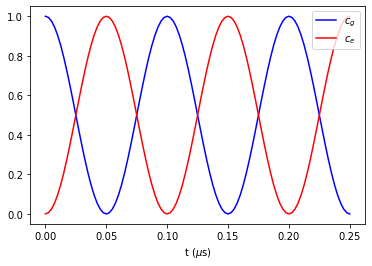

In [11]:
c_g = np.zeros(len(t_range), dtype=np.complex)
c_e = np.zeros(len(t_range), dtype=np.complex)

for i, state in enumerate(ode_data.states):
    c_g[i] = state[0,0]
    c_e[i] = state[1,0]    

plt.plot(t_range, abs(c_g)**2, 'b', label=r'$c_g$')
plt.plot(t_range, abs(c_e)**2, 'r', label=r'$c_e$')
plt.xlabel(r't ($\mu$s)')
plt.legend()